In [13]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [14]:
pqr_agrs_100_30k = pd.read_csv('../cass_exp/sep7/maze_agrs_merge.csv', header = 2)

In [15]:
pqr_agrs_100_30k

,wall_time,step,run/total_reward,run/length,loss/value_loss,loss/policy_loss,loss/agent_loss,loss/entropy,total_loss
0,1.599146e+09,0,1.0,11.0,0.154896,1.589820,1.744717,1.707709,1.744717
1,1.599146e+09,11,1.0,18.0,0.079943,1.575362,1.655304,1.651052,1.655304
2,1.599146e+09,29,0.0,13.0,0.054362,1.559821,1.614183,1.507170,1.614183
3,1.599146e+09,42,1.0,23.0,0.020890,1.500514,1.521403,1.485286,1.521403
4,1.599146e+09,65,1.0,18.0,0.073717,1.600120,1.673837,1.549309,1.673837
...,...,...,...,...,...,...,...,...,...
83718,1.599403e+09,29567,1.0,54.0,0.015385,1.354476,1.369861,1.333744,1.369861
83719,1.599403e+09,29621,1.0,61.0,0.015272,1.301391,1.316663,1.283785,1.316663
83720,1.599403e+09,29682,1.0,54.0,0.018635,1.307172,1.325807,1.254549,1.325807
83721,1.599403e+09,29736,1.0,55.0,0.037272,1.227646,1.264917,1.235762,1.264917


In [16]:
pqr_agrs_100_30k.sort_values(by='step', inplace=True)

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_agrs_100_30k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length'])


for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)
df_av_at_step.set_index('step')


rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span = 1000).var()
rolling

df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']

df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_agrs = df_av_at_step
df_agrs

,step,reward,length,reward_se,length_se
0,0.0,0.850000,9.680000,0.000000,0.000000
1,4.0,0.925075,9.840160,0.011250,0.051200
2,5.0,0.950100,9.058546,0.007492,1.852849
3,6.0,0.948682,9.364269,0.004998,1.606372
4,7.0,0.958987,9.424991,0.004273,1.221917
...,...,...,...,...,...
28045,29868.0,0.966454,35.713016,0.015612,225.608114
28046,29872.0,0.966521,35.683620,0.015583,225.589430
28047,29876.0,0.966588,35.692244,0.015554,225.175890
28048,29883.0,0.966654,35.648903,0.015525,225.665215


In [18]:
pqr_no_agrs_100_30k = pd.read_csv('../cass_exp/sep7/maze_van_merge.csv', header = 2)

pqr_no_agrs_100_30k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_no_agrs_100_30k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        
# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).var()
df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_no_agrs = df_av_at_step
df_no_agrs

,step,reward,length,reward_se,length_se
0,0.0,0.830000,9.900000,0.000000,0.000000
1,4.0,0.915085,9.449550,0.014450,0.405000
2,5.0,0.913083,10.392492,0.007230,2.861730
3,6.0,0.934877,10.544825,0.006707,1.998363
4,7.0,0.929700,10.398914,0.005159,1.603191
...,...,...,...,...,...
27890,29840.0,0.929825,39.156226,0.036225,195.990861
27891,29846.0,0.929965,39.201868,0.036162,196.640862
27892,29862.0,0.930105,39.231434,0.036100,196.685068
27893,29866.0,0.930245,39.234968,0.036037,196.298334


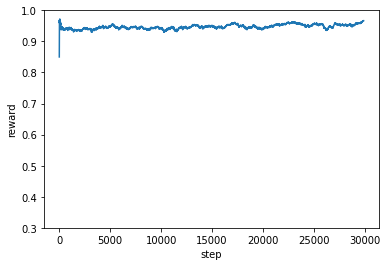

In [19]:
plt.ylim(0.3, 1)
sns.lineplot(x="step", y="reward", data=df_agrs)

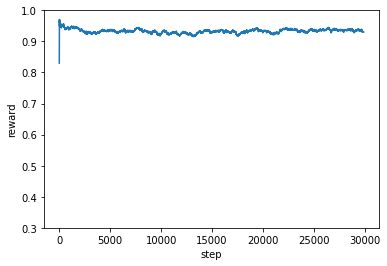

In [20]:
plt.ylim(0.3, 1)
sns.lineplot(x="step", y="reward", data=df_no_agrs)

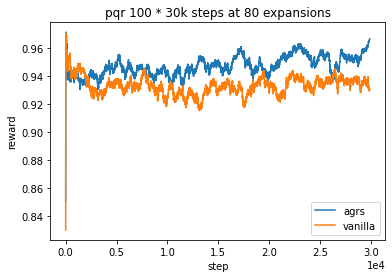

In [21]:
fig, axs = plt.subplots(ncols=1)
plt.title('pqr 100 * 30k steps at 80 expansions')
sns.lineplot(x="step", y="reward", data=df_agrs,ax=axs, ci=99)
sns.lineplot(x="step", y="reward", data=df_no_agrs,ax=axs, ci=99)
axs.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

axs.legend(['agrs','vanilla'], loc=4)

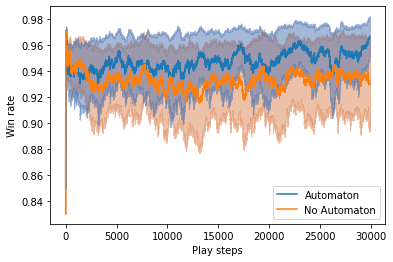

In [24]:
fig, axs = plt.subplots(ncols=1)
#plt.title('Mine Maze, Fixed 10x10')
sns.lineplot(x="step", y="reward", data=df_agrs,ax=axs, ci=99)
sns.lineplot(x="step", y="reward", data=df_no_agrs,ax=axs, ci=99)
axs.fill_between(x=df_no_agrs["step"], y1=df_no_agrs["reward"] + df_no_agrs["reward_se"], 
                 y2=df_no_agrs["reward"] - df_no_agrs["reward_se"], alpha=.5, color='#dd8452')
axs.fill_between(x=df_agrs["step"], y1=df_agrs["reward"] + df_agrs["reward_se"], 
                 y2=df_agrs["reward"] - df_agrs["reward_se"], alpha=.5, color='#4c72b0')

axs.set(xlabel='Play steps', ylabel='Win rate')

axs.legend(['Automaton', 'No Automaton'], loc=4)